# **House Price Prediction**
- The House Price Prediction Dataset is a collection of house amenities to predict the correct price of it.
- This can be used by real estate agents, appraisers, and other professionals who need to estimate the value of a house.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## **Loading Dataset**

In [ ]:
# Load the Data from Housing Dataset.

df = pd.read_csv('Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


## **Data Cleaning**

In [ ]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          544 non-null    float64
 3   bathrooms         543 non-null    float64
 4   stories           544 non-null    float64
 5   mainroad          543 non-null    object 
 6   guestroom         544 non-null    object 
 7   basement          542 non-null    object 
 8   hotwaterheating   544 non-null    object 
 9   airconditioning   544 non-null    object 
 10  parking           543 non-null    float64
 11  prefarea          543 non-null    object 
 12  furnishingstatus  541 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 55.5+ KB


In [ ]:
# To get the dimension of a dataset.
df.shape

(545, 13)

In [ ]:
# It gives the statistical data of the dataset.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,544.000000,543.000000,544.000000,543.000000
mean,4.766729e+06,5150.541284,2.963235,1.285451,1.805147,0.688766
std,1.870440e+06,2170.141023,0.737405,0.502310,0.868251,0.859505
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# To check whether the missing values are present in the dataset or not. isnull() is used to check the null values. 
df.isnull().sum()

price               0
area                0
bedrooms            1
bathrooms           2
stories             1
mainroad            2
guestroom           1
basement            3
hotwaterheating     1
airconditioning     1
parking             2
prefarea            2
furnishingstatus    4
dtype: int64

In [ ]:
# To handle null values we can use different methods like fill with mean, mode, median, forward fill, or backward fill.
# The data is filled with numerical values using mean values.

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms']).mean()
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms']).mean()
df['stories'] = df['stories'].fillna(df['stories']).mean()
df['parking'] = df['parking'].fillna(df['parking']).mean()

In [ ]:
# check for remaining null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            2
guestroom           1
basement            3
hotwaterheating     1
airconditioning     1
parking             0
prefarea            2
furnishingstatus    4
dtype: int64

### Label Encoding
label encoding is used to convert categorical data into numerical data.

In [ ]:
# I use label encoding to convert categorical data into numerical data. for that first use labelencoder from preprocessing library.

column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label = preprocessing.LabelEncoder()

In [ ]:
# Use one column from column variable and convert the categorical data into numerical data.

mapping = { }
for col in column:
  df[col] = label.fit_transform(df[col])
  label_mapping = dict(zip(label.classes_,label.transform(label.classes_)))
  mapping[col] = label_mapping


In [ ]:
df.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking             float64
prefarea              int64
furnishingstatus      int64
dtype: object

In [ ]:
# To Change the datatype of some columns from float to int astype(datatype) method is used with column.

df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['stories'] = df['stories'].astype(int)
df['parking'] = df['parking'].astype(int)

In [ ]:
# check the categorical data which is converted into numerical data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,2,1,1,1,0,0,0,1,0,1,0
1,12250000,8960,2,1,1,1,0,0,0,1,0,0,0
2,12250000,9960,2,1,1,1,0,1,0,0,0,1,1
3,12215000,7500,2,1,1,1,0,1,0,1,0,1,0
4,11410000,7420,2,1,1,1,1,1,0,1,0,0,0


## **Data Visualization**

Text(0.5, 1.0, 'Price VS Area')

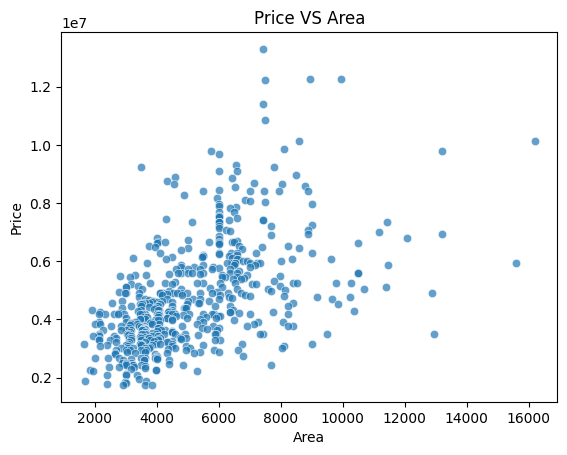

In [ ]:
# Area and Price are numerical data, so i apply scatter plot on it and print the xlabel, ylabel and title.

sns.scatterplot(x=df['area'],y= df['price'],alpha=0.7) # alpha is used for transparancy
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price VS Area")

Text(0.5, 1.0, 'Price VS Bedrooms')

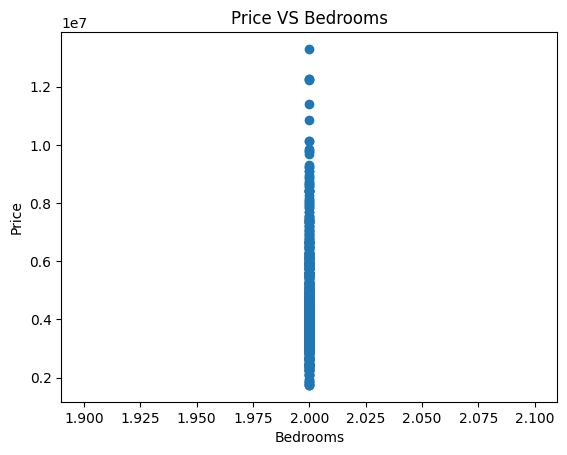

In [ ]:
# It is a scatter graph of Price and bedrooms.

plt.scatter(df['bedrooms'],df['price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price VS Bedrooms")

In [ ]:
# Create a function for scatter plot and subplots. it is used to see the scatter plot in 4 subplots.
 
color = ['r','b','g','y']
marker = ['*','o','x','.']

def graph(feature):
  for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.scatter(df[feature[i]],df['price'], c=color[i] ,s=70, marker=marker[i])


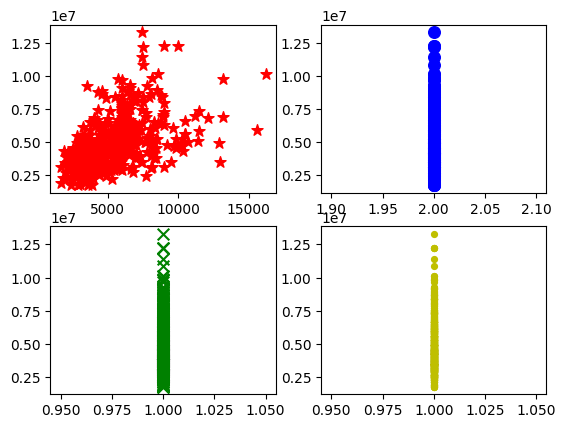

In [ ]:
# use a list of columns and store in the X variable.
# call the funciton graph with 

X = ['area','bedrooms','bathrooms','stories']
graph(X)


# plt.subplot(2,2,1)
# plt.scatter(df['area'],df['price'], c='r',s=70, marker='*')
# plt.subplot(2,2,2)
# plt.scatter(df['bedrooms'],df['price'], c='b',s=70, marker='o')
# plt.subplot(2,2,3)
# plt.scatter(df['bathrooms'],df['price'], c='g',s=70, marker='x')
# plt.subplot(2,2,4)
# plt.scatter(df['stories'],df['price'], c='y',s=70, marker='.')


<Axes: title={'center': 'price'}, xlabel='parking'>

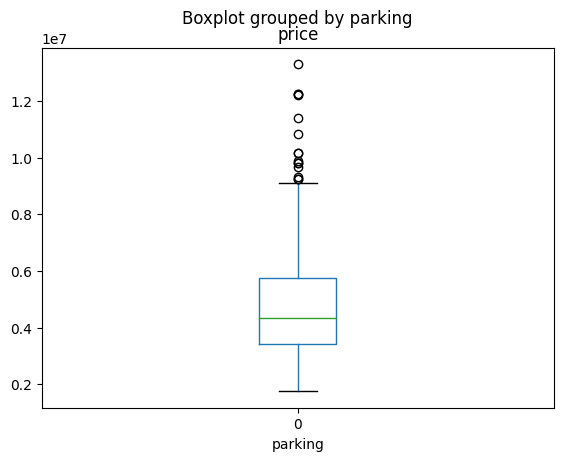

In [ ]:
# Boxplot of parking with respect to price.

df.boxplot(by="parking", column =['price'], grid = False)

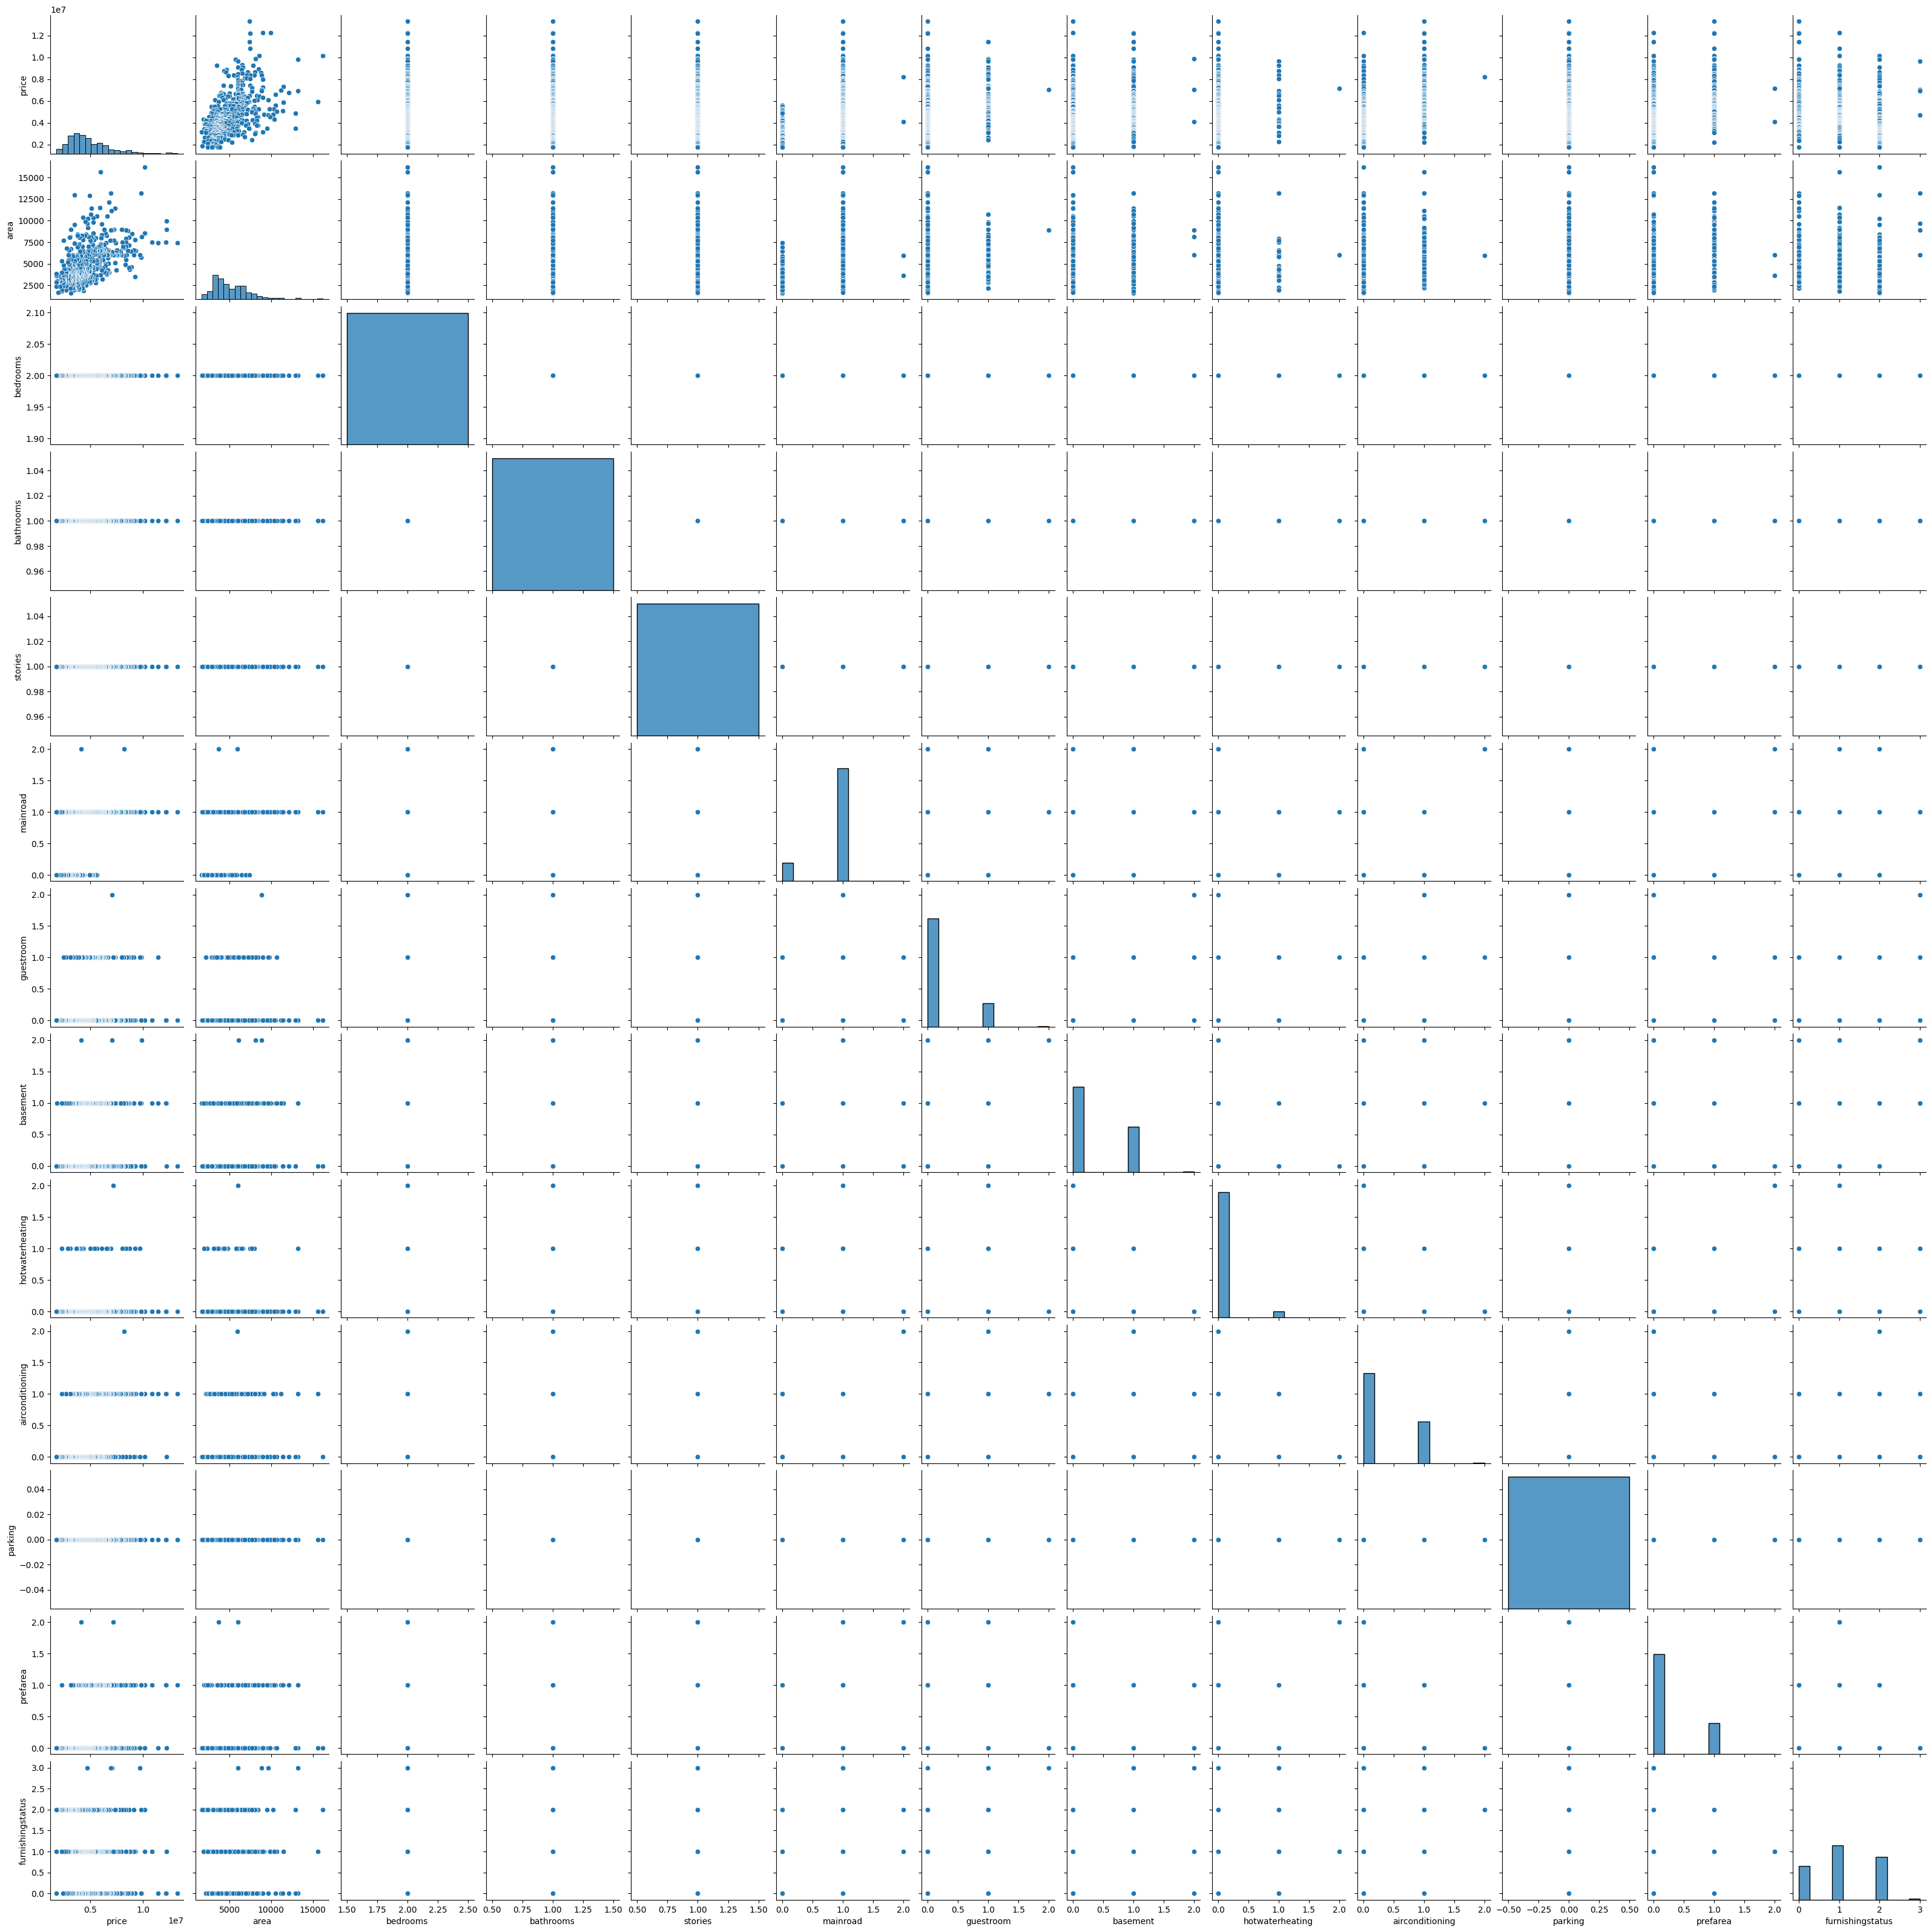

In [ ]:
sns.pairplot(df)

<Axes: xlabel='count'>

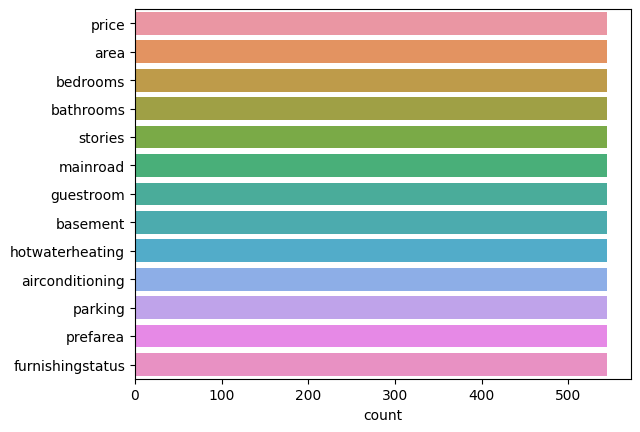

In [ ]:
# Countplot of all the columns
sns.countplot(df,orient='h')

## **Model Building**

In [ ]:
# X is the independent variable and y is the dependent variable.

# X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
# y = df['price']

# X = df.iloc[:,1:].values
# y = df.iloc[:,0].values

X = df.drop('price',axis=1)
y = df['price']


In [ ]:
# Split the data into training and testing using the train_test_split() function.
# I give 80% data into training and 20% data in testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# print the training and testing data.

print("Training Data: \n",X_train,y_train)
print("\n\n\nTesting Data: \n",X_test,y_test)

Training Data: 
       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
443   4320         2          1        1         0          0         0   
323   5400         2          1        1         1          0         0   
157   2817         2          1        1         0          1         1   
231   4320         2          1        1         1          0         0   
351   3600         2          1        1         1          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
369   3600         2          1        1         1          0         0   
320   4320         2          1        1         1          0         0   
527   1836         2          1        1         0          0         1   
125  15600         2          1        1         1          0         0   
265   2880         2          1        1         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
443  

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,2,1,1,1,0,0,0,1,0,1,0
1,12250000,8960,2,1,1,1,0,0,0,1,0,0,0
2,12250000,9960,2,1,1,1,0,1,0,0,0,1,1
3,12215000,7500,2,1,1,1,0,1,0,1,0,1,0
4,11410000,7420,2,1,1,1,1,1,0,1,0,0,0


In [ ]:
# to check how much data split into training and testing
print(X.shape,X_train.shape,X_test.shape)

(545, 12) (436, 12) (109, 12)


## **Linear Regression**



In [ ]:
# I used a Linear regression model and fit the training data into it.
# It is not much good then other models, it's r2_score is 0.23

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("R2_Score is: ",r2_score(y_pred,y_test))

result = model.predict([[7420,2,1,1,1,1,0,1,1,0,1,0]])
print("\nInput: [7420,2,1,1,1,1,0,1,1,0,1,0]\nPredicted Output: ",result)


R2_Score is:  0.23541242712816013

Input: [7420,2,1,1,1,1,0,1,1,0,1,0]
Predicted Output:  [8855321.42748777]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Random Forest Regressor**
- It gives good accuracy and predicts the data very nearly to the actual data.
- The R2_score of Random Forest Regressor is 0.12.

In [ ]:
# Use the Random Forest model to predict the price of a house.
# Train the model using X_train and y_train and then predict it by X_test.

random = RandomForestRegressor(n_estimators=138, max_leaf_nodes=134, random_state=4) #n_estimators=100, random_state=1, max_leaf_nodes=90,
random.fit(X_train,y_train)

y_pred = random.predict(X_test)
print("R2_Score is: ",r2_score(y_pred,y_test))

result = random.predict([[7420,2,1,1,1,1,0,1,1,0,1,0]])  # 9960,2,1,1,1,0,1,0,0,0,1,1
print("\nInput: [7420,2,1,1,1,1,0,1,1,0,1,0]\nPredicted Output: ",result)


R2_Score is:  0.1291381622158262

Input: [7420,2,1,1,1,1,0,1,1,0,1,0]
Predicted Output:  [11097799.39130435]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## **Decision Tree Regressor**

- It is the best model for predicting Price then other models.
- It gives good accuracy and predict the data accuratly.
- R2_score of Decision tree is 0.13.

In [ ]:
# Use the Decision tree Regressor for House Price Prediction 
# Fit the model using training data, predict the data using X_test and find the accuracy of model

decision = DecisionTreeRegressor(random_state=8)
decision.fit(X_train,y_train)

y_pred = decision.predict(X_test)
print("R2_Score is: ",r2_score(y_pred,y_test))

result = decision.predict([[7420,2,1,1,1,1,0,1,1,0,1,0]])
print("\nInput: [7420,2,1,1,1,1,0,1,1,0,1,0]\nPredicted Output: ",result)

R2_Score is:  0.1391046856176733

Input: [7420,2,1,1,1,1,0,1,1,0,1,0]
Predicted Output:  [13300000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# see the 1st predicted value 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,2,1,1,1,0,0,0,1,0,1,0
1,12250000,8960,2,1,1,1,0,0,0,1,0,0,0
2,12250000,9960,2,1,1,1,0,1,0,0,0,1,1
3,12215000,7500,2,1,1,1,0,1,0,1,0,1,0
4,11410000,7420,2,1,1,1,1,1,0,1,0,0,0
